# Entendimento de negócio

`Objetivo geral`
- Foi requisitado um modelo de performance para a identificação de clientes em _churn_
- Uma espécie de _score_ correspondente à probabilidade de um cliente entrar em _churn_
 
`Métricas`   
- Taxa atual de churn da empresa  
- Variação da taxa de churn por mês  
- Performance do modelo em classificar os clientes com churn  
- Qual o faturamento da empresa se ela impedir o churn de clientes  
- Qual o valor de um cupom de desconto daria para o cliente, a fim de evitar o churn
- Qual o custo total dessse incentivo para a empresa

# Objetivos da Sprint 1

- Descrição dos dados
- Análise geral dos dados
- Planejamento e substituições de NA
- Lista de hipóteses
- Split do dataset

## Descrição dos dados

Coluna | Descrição
-------|----------
RowNumber | Nº da linha
CustomerId | ID do cliente
Surname | Sobrenome do cliente
CreditScore | Pontuação de crédito do cliente para o mercado de consumo
Geography | País onde o cliente reside
Gender | Gênero do cliente
Age | Idade do cliente
Tenure| Nº de meses que o cliente permaneceu ativo
Balance  | Valor gasto pelo cliente
NumOfProducts | Nº de produtos comprados pelo cliente
HasCrCard | Indica se o cliente possui ou não um cartão de crédito
IsActiveMember | Indica se o cliente ainda tem o cadastro ativo na empresa
EstimatedSalary | Estimativa de salário mensal do cliente
Exited | Indica se o cliente está ou não em churn 

## Bibliotecas

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## Carregando o dataset

In [5]:
df_raw = pd.read_csv('data/churn.csv')

## Análise geral dos dados

In [6]:
# analisando colunas

df_raw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# checando linhas do dataset

df_raw.shape

(10000, 14)

In [8]:
# checando colunas

df_raw.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# checando os tipos de dados

df_raw. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
# ver como os dados estão distribuídos

df_raw.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
# checando se há dados duplicados

df_raw.duplicated().sum()

0

In [12]:
# quantidade de clientes por sobrenome

df_raw['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [13]:
# quantos sobrenomes únicos existem

df_raw['Surname'].unique().shape

(2932,)

In [14]:
# quantos clientes são recém-chegados

(df_raw['Tenure'] == 0).sum()

413

In [15]:
# quantidade de clientes por produto

df_raw['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [16]:
# contabilizando clientes com e sem cartão

df_raw['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [17]:
# contabilizando clientes por gênero

df_raw['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [18]:
# verificando quantidade de clientes ativos

df_raw['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [19]:
# verificando clientes em churn

df_raw['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [20]:
# checando países com mais clientes

df_raw['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

## Planejamento e substituições de NA

In [21]:
# checando dados nulos

df_raw.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Não foram verificados dados nulos.

## Levantamento de hipóteses

`Hipótese 1`: Mulheres estão entre os clientes mais cadastrados  
`Hipótese 2`: Mulheres compram mais produtos do que homens  
`Hipótese 3`: A taxa de churn de homens é maior  
`Hipótese 4`: Os clientes mais ativos compram mais produtos  
`Hipótese 5`: Clientes franceses utilizam mais o cartão de crédito  
`Hipótese 6`: Clientes franceses têm um _credit score_ maior   
`Hipótese 7`: Clientes franceses têm menos churn com relação às demais nacionalidades  
`Hipótese 8`: Clientes que compram mais produtos possuem menor risco de churn   
`Hipótese 9`: Clientes com mais gastos por salário têm menos churn  
`Hipótese 10`: Clientes recém-chegados compram mais  
`Hipótese 11`: Clientes mais antigos compram menos    
`Hipótese 12`: Clientes com maior Tenure possuem maior churn

## Split do dataset

In [22]:
# cópia do dataset

df1 = df_raw.copy()

In [23]:
# separando features de targets

X = df1.drop('Exited', axis=1)
y = df1['Exited']

In [24]:
# separando os dados em treino, teste e validação

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1, stratify=y_train_val, random_state=42)

In [25]:
# instâncias por split

print(f'Dados de treino: {X_train.shape[0]}')
print(f'Dados de validação:{X_val.shape[0]}')
print(f'Dados de teste: {X_test.shape[0]}')

Dados de treino: 8100
Dados de validação:900
Dados de teste: 1000


# Objetivos da Sprint 2

- EDA
- Data preparation

## EDA

### Análise do target

<AxesSubplot: xlabel='Exited', ylabel='count'>

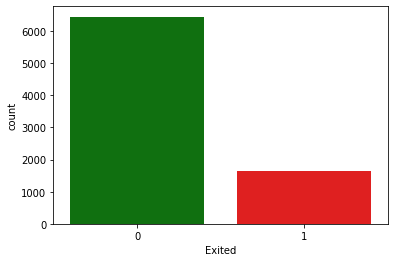

In [26]:
# verificando se os dados estão desbalanceados

sns.countplot(data=X_train.join(y_train), x='Exited', palette=['g', 'r'])

In [27]:
# checando a porcentagem dos dados

y_train.value_counts(normalize=True)

0    0.796296
1    0.203704
Name: Exited, dtype: float64

### Análise das colunas numéricas

In [28]:
# separando colunas com dados numéricos
colunas_numericas = X_train.join(
    y_train).select_dtypes(include=['int64', 'float64'])

# separando colunas com dados categóricos
colunas_categoricas = X_train.join(y_train).select_dtypes(
    exclude=['int64', 'float64'])

array([[<AxesSubplot: title={'center': 'RowNumber'}>,
        <AxesSubplot: title={'center': 'CustomerId'}>,
        <AxesSubplot: title={'center': 'CreditScore'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Tenure'}>,
        <AxesSubplot: title={'center': 'Balance'}>],
       [<AxesSubplot: title={'center': 'NumOfProducts'}>,
        <AxesSubplot: title={'center': 'HasCrCard'}>,
        <AxesSubplot: title={'center': 'IsActiveMember'}>],
       [<AxesSubplot: title={'center': 'EstimatedSalary'}>,
        <AxesSubplot: title={'center': 'Exited'}>, <AxesSubplot: >]],
      dtype=object)

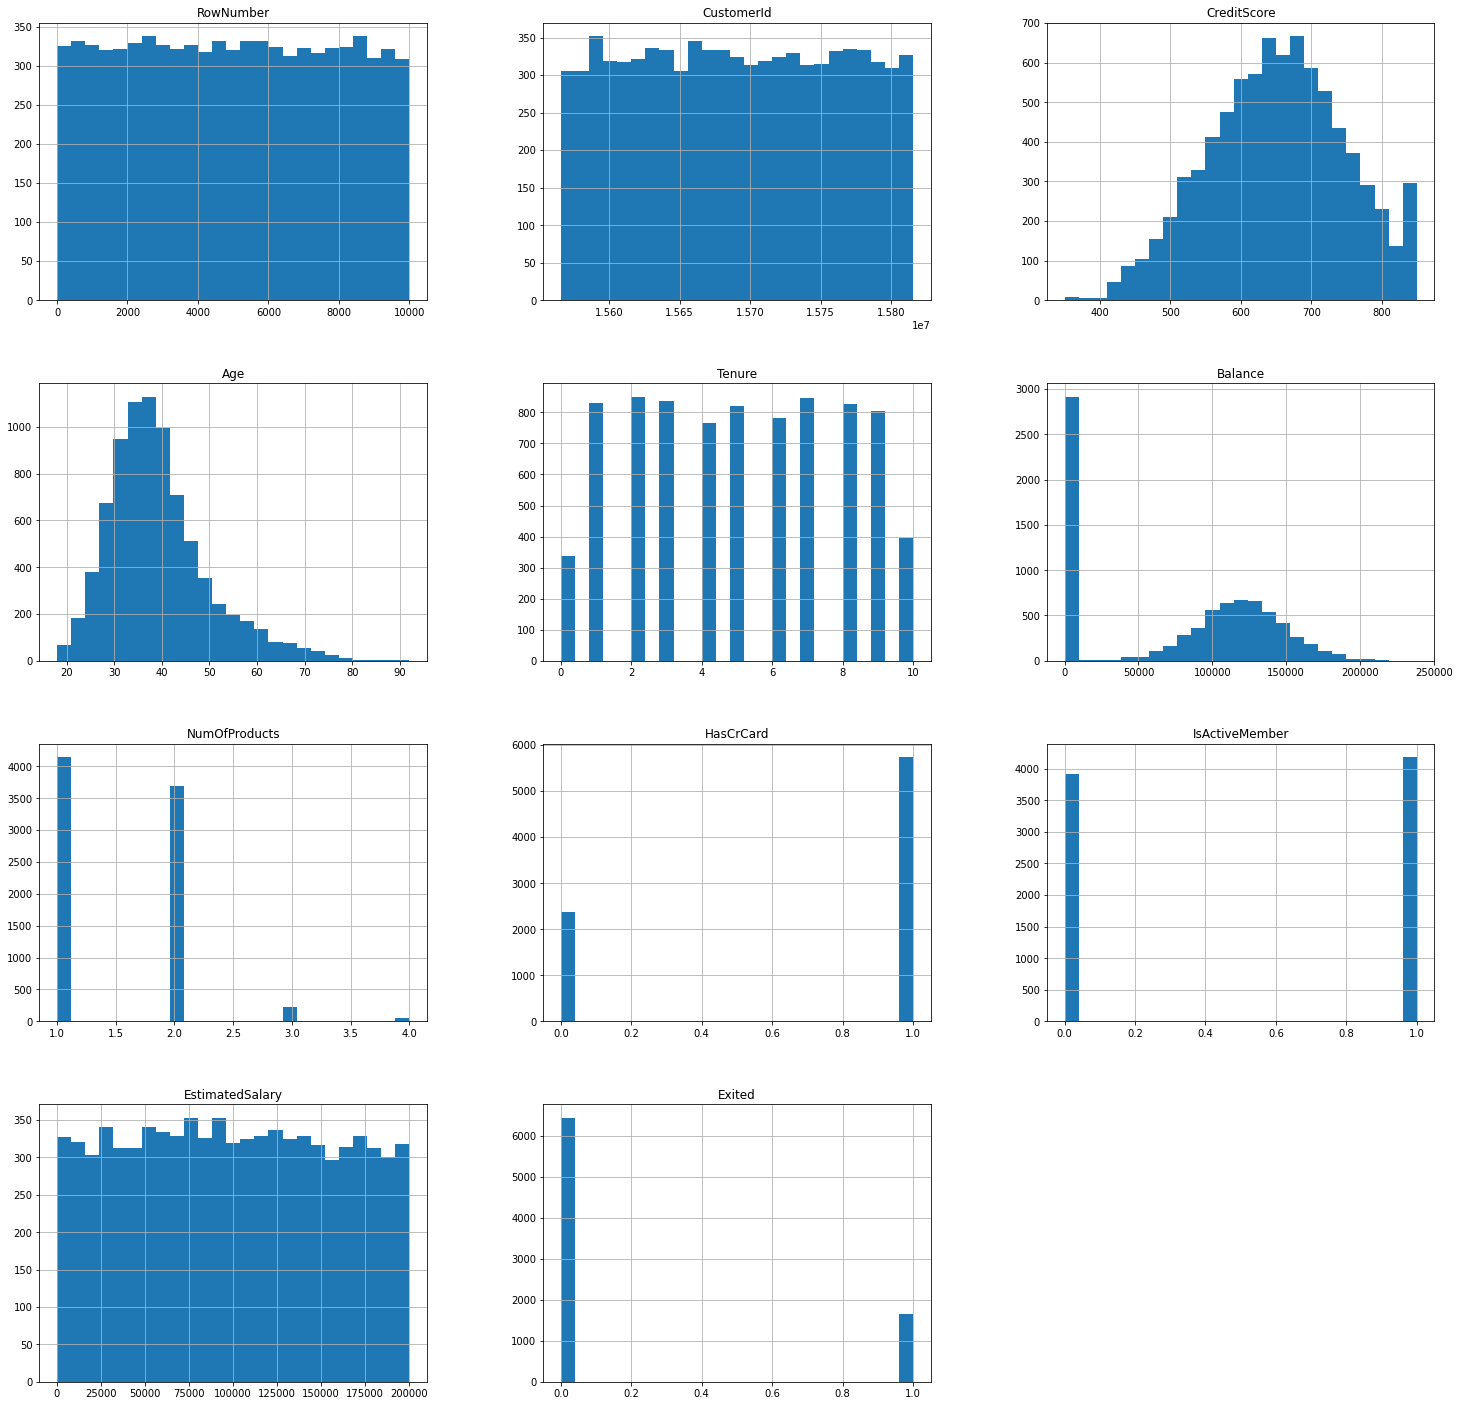

In [29]:
# checando as distribuições das variáveis numéricas

colunas_numericas.hist(figsize=(25, 25), bins=25)

In [30]:
# análise estatística

colunas_numericas.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8100.000000,8.100000e+03,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000
mean,4975.722593,1.569080e+07,651.458889,38.989383,5.017901,76660.420195,1.527778,0.708272,0.516667,99382.137130,0.203704
std,2880.771212,7.187825e+04,96.536899,10.521793,2.895394,62325.766615,0.583845,0.454586,0.499753,57254.573553,0.402776
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,2487.500000,1.562858e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50588.367500,0.000000
50%,4966.500000,1.569033e+07,653.000000,37.000000,5.000000,97331.670000,1.000000,1.000000,1.000000,98923.585000,0.000000
75%,7478.250000,1.575309e+07,718.000000,44.000000,8.000000,127762.890000,2.000000,1.000000,1.000000,148090.647500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000


### Análise das colunas categóricas

In [31]:
# valores únicos dos dados categóricos
colunas_categoricas.apply(lambda x: x.unique().shape[0])

Surname      2642
Geography       3
Gender          2
dtype: int64

<AxesSubplot: xlabel='Geography', ylabel='count'>

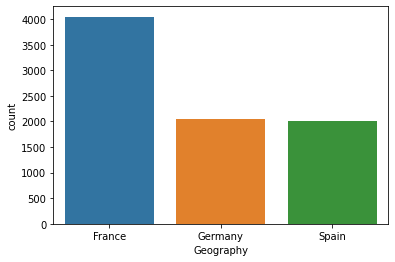

In [32]:
# país

sns.countplot(data=X_train.join(y_train), x='Geography')

<AxesSubplot: xlabel='Gender', ylabel='count'>

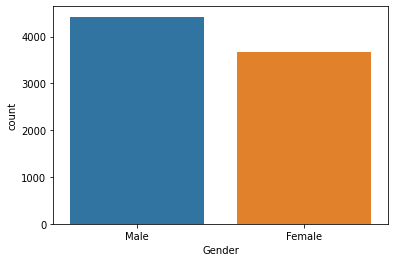

In [33]:
# quantidade de pessoas por gênero

sns.countplot(data=X_train.join(y_train), x='Gender')

### Hipóteses

 `Hipótese 1`: Mulheres estão entre os clientes mais cadastrados - **FALSA**
 
Há mais homens cadastrados.

In [34]:
filtro = X_train['IsActiveMember'] == 1
h1 = X_train.join(y_train).loc[filtro, ['Gender', 'IsActiveMember']].groupby(
    'Gender').count().reset_index()
h1

,Gender,IsActiveMember
0,Female,1842
1,Male,2343


<AxesSubplot: xlabel='Gender', ylabel='IsActiveMember'>

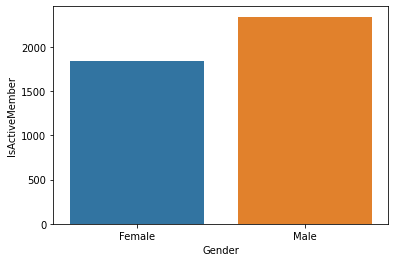

In [35]:
sns.barplot(data=h1, x='Gender', y='IsActiveMember')

`Hipótese 2`: Mulheres compram mais produtos do que homens - **FALSA**  
 
 Não há diferença de compra entre os gêneros.

<AxesSubplot: xlabel='Gender'>

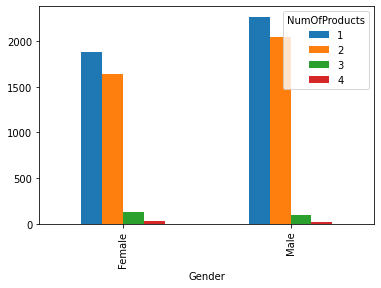

In [36]:
X_train.join(y_train).groupby(
    ['Gender', 'NumOfProducts']).size().unstack().plot(kind='bar')

 `Hipótese 3`: A taxa de churn de homens é maior - **FALSA**
 
Mulheres dão mais churn.

<AxesSubplot: xlabel='Gender'>

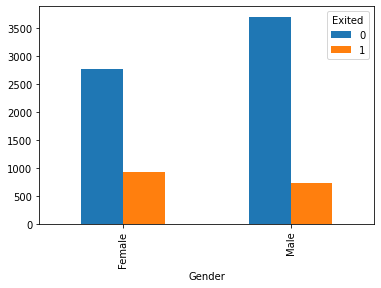

In [37]:
X_train.join(y_train).groupby(
    ['Gender', 'Exited']).size().unstack().plot(kind='bar')

In [38]:
churn_gender = X_train.join(y_train).groupby(
    ['Gender', 'Exited']).size().unstack()
churn_gender

Exited,0,1
Gender,,
Female,2753,924
Male,3697,726


In [39]:
# proporção de gênero por churn

churn_gender.iloc[:, 1] / churn_gender.sum(axis=1)

Gender
Female    0.251292
Male      0.164142
dtype: float64

`Hipótese 4`: Os clientes mais ativos compram mais produtos - **PARCIALMENTE VERDADEIRA**

Até a compra de 2 produtos, os membros ativos compram um pouco mais que os clientes não ativos, porém quando chega a 3 produtos, os clientes ativos compram menos.

<AxesSubplot: xlabel='NumOfProducts'>

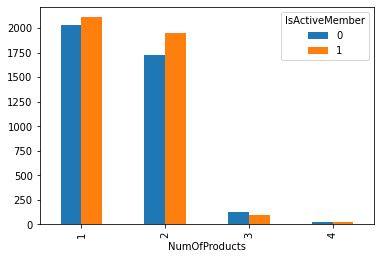

In [40]:
X_train.join(y_train).groupby(
    ['NumOfProducts', 'IsActiveMember']).size().unstack().plot(kind='bar')

 `Hipótese 5`: Clientes franceses utilizam mais o cartão de crédito **FALSA**
 
 A proporção é praticamente a mesma.

In [41]:
h5 = X_train.join(y_train).groupby(['Geography', 'HasCrCard']).size().unstack()
h5

HasCrCard,0,1
Geography,,
France,1188,2858
Germany,571,1468
Spain,604,1411


<AxesSubplot: xlabel='Geography'>

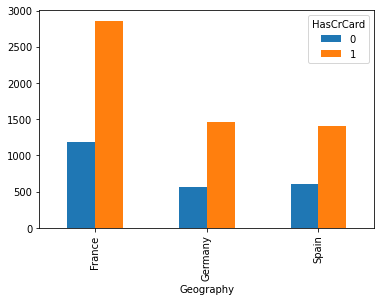

In [42]:
X_train.join(y_train).groupby(
    ['Geography', 'HasCrCard']).size().unstack().plot(kind='bar')

In [43]:
# proporção dos países com o cartão de crédito

h5.iloc[:, 1] / h5.sum(axis=1)

Geography
France     0.706377
Germany    0.719961
Spain      0.700248
dtype: float64

`Hipótese 6`: Clientes franceses têm um _credit score_ maior - **FALSA**

Não foi vista nenhuma diferença entre as distribuições.

<AxesSubplot: xlabel='CreditScore', ylabel='Count'>

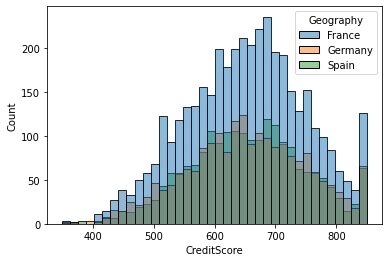

In [44]:
sns.histplot(X_train.join(y_train), x='CreditScore', hue='Geography')

In [45]:
X_train[['CreditScore', 'Geography']].groupby('Geography').describe()

CreditScore                                                     \
                count        mean        std    min    25%    50%    75%   
Geography                                                                  
France         4046.0  650.727138  97.023465  350.0  583.0  654.0  718.0   
Germany        2039.0  651.898970  97.907702  350.0  585.0  651.0  723.0   
Spain          2015.0  652.482878  94.167035  358.0  588.0  653.0  717.0   

                  
             max  
Geography         
France     850.0  
Germany    850.0  
Spain      850.0

 `Hipótese 7`: Clientes franceses têm menos churn com relação às demais nacionalidades - **PARCIALMENTE VERDADEIRA**
 
 Não foi notada nenhuma diferença entre a França e Espanha, no entanto, a Alemanha apresenta maior churn. 

In [46]:
h7 = X_train.join(y_train).groupby(['Geography', 'Exited']).size().unstack()
h7

Exited,0,1
Geography,,
France,3389,657
Germany,1374,665
Spain,1687,328


<AxesSubplot: xlabel='Geography'>

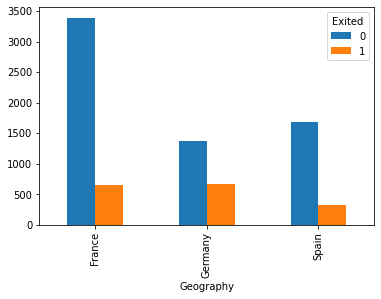

In [47]:
X_train.join(y_train).groupby(
    ['Geography', 'Exited']).size().unstack().plot(kind='bar')

In [48]:
# proporção do churn por país

h7.iloc[:, 1] / h7.sum(axis=1)

Geography
France     0.162383
Germany    0.326140
Spain      0.162779
dtype: float64

`Hipótese 8`: Clientes que compram mais produtos possuem menor risco de churn - **PARCIAL**

Clientes que compram mais de dois produtos têm maior churn.

<AxesSubplot: xlabel='NumOfProducts'>

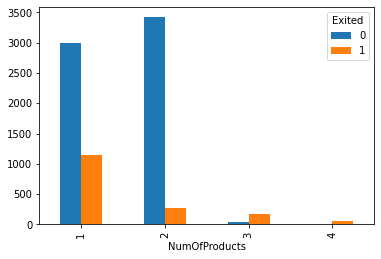

In [49]:
X_train.join(y_train).groupby(
    ['NumOfProducts', 'Exited']).size().unstack().plot(kind='bar')

 `Hipótese 9`: Clientes com mais gastos por salário têm menos churn
 
 Inserir coluna de features engineering (gastos por salário).

`Hipótese 10`: Clientes recém-chegados compram mais - **FALSA**

Clientes recém-chegados não compram que os demais. Também foi observado que compram mais 1 ou 2 produtos.

<AxesSubplot: xlabel='Tenure', ylabel='Count'>

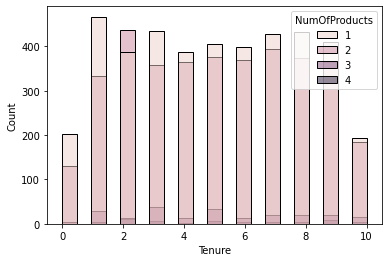

In [50]:
sns.histplot(X_train.join(y_train), x='Tenure', hue='NumOfProducts')

`Hipótese 11`: Clientes mais antigos compram menos  - **VERDADEIRO**

Verdadeiro. Como visto acima, clientes mais antigos compram menos e, geralmente, compram 2 produtos.

Compram a mesma quantidade que clientes recém-chegados.

 `Hipótese 12`: Clientes com maior Tenure possuem maior churn- **FALSA**
 
Não há diferença.

<AxesSubplot: xlabel='Tenure', ylabel='Count'>

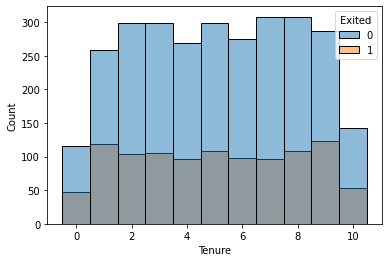

In [51]:
sns.histplot(data=X_train.join(y_train)[
             X_train['IsActiveMember'] == 0], x='Tenure', hue='Exited', discrete=True)

### Correlação de variáveis numéricas

<function matplotlib.pyplot.show(close=None, block=None)>

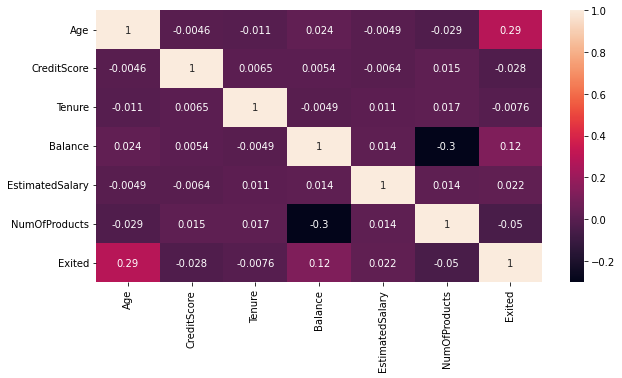

In [52]:
plt.figure(figsize=(10, 5))

cols = colunas_numericas[['Age', 'CreditScore', 'Tenure',
                          'Balance', 'EstimatedSalary', 'NumOfProducts']].join(y_train)

sns.heatmap(cols.corr(), annot=True)
plt.show

Existe uma correlação entre 'Age' e 'Exited'.

## Data preparation

### Features engineering

- Inserir coluna de gasto por salário
- `BalancePerSalary` = 'Balance' / 'EstimatedSalary'

In [53]:
# criando classes para tratar igualmente os dados de treino, teste e validação

from sklearn.base import BaseEstimator, TransformerMixin


class Feature_drop(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.drop(self.cols, axis=1)


class Add_BalancePerSalary(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X['BalancePerSalary'] = X['Balance']/X['EstimatedSalary']
        return X

### Criação do pipeline / transformação

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [55]:
# instanciando transformadores


fd = Feature_drop(['RowNumber', 'CustomerId', 'Surname'])
# encoding (one hot encoding)
ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_ct = ColumnTransformer(
    [('ohe_ct', ohe, ['Geography', 'Gender'])], remainder='passthrough')
standard_scaler = StandardScaler()


pipeline = Pipeline([('drop', fd), ('one_hot', ohe_ct),
                    ('StanderScaler', standard_scaler)])

# Objetivos da Sprint 3

- Utilizar algoritmos de Machine learning

- Ver métricas de performance

- Ver avaliação final

In [56]:
# transformando dados de treino

X_train_tr = pipeline.fit_transform(X_train)


# transformando os dados de validação

X_val_tr = pipeline.fit_transform(X_val)

In [57]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [58]:
def ml_metrics(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return pd.DataFrame([{'Model': model_name, 'Accuracy': accuracy, 'Recall': recall,
                          'Precision': precision}], index=[0])

Obs: os modelos possuem como parâmetro o class_weight='balanced' porque os dados estão desbalanceados, por isso, irão considerar mais a classe mais desbalanceada _não churn_.

## LogisticRegression

In [59]:
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train_tr, y_train)
y_val_pred = log_reg.predict(X_val_tr)

In [60]:
log_reg_result = ml_metrics('LogisticRegression',y_val, y_val_pred)
log_reg_result

,Model,Accuracy,Recall,Precision
0,LogisticRegression,0.714444,0.655738,0.382166


## SVM

In [61]:
svm = SVC(class_weight='balanced')
svm.fit(X_train_tr, y_train)
y_val_pred = svm.predict(X_val_tr)

In [62]:
svm_result = ml_metrics('SVM',y_val, y_val_pred)
svm_result

,Model,Accuracy,Recall,Precision
0,SVM,0.791111,0.693989,0.490347


## Random Forest Classifier

In [63]:
rfc = RandomForestClassifier(class_weight='balanced',random_state=42, min_samples_leaf=25)
rfc.fit(X_train_tr, y_train)
y_val_pred = rfc.predict(X_val_tr)

In [64]:
rfc_result = ml_metrics('Random Forest Classifier',y_val, y_val_pred)
rfc_result

,Model,Accuracy,Recall,Precision
0,Random Forest Classifier,0.801111,0.704918,0.507874


## Comparando performances do modelo

In [65]:
metrics =  pd.concat([log_reg_result, svm_result, rfc_result])
metrics

,Model,Accuracy,Recall,Precision
0,LogisticRegression,0.714444,0.655738,0.382166
0,SVM,0.791111,0.693989,0.490347
0,Random Forest Classifier,0.801111,0.704918,0.507874


## Otimização dos hiperparâmetros

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
param = {'n_estimators' : [100, 200, 400, 500],
        'min_samples_leaf': [10, 25, 50, 100],
        }

In [68]:
# otimização dos hiperparâmetros

rfc_tuned = RandomizedSearchCV(estimator= rfc, param_distributions= param, n_iter= 10, scoring='recall', cv= 5, random_state= 42)
rfc_tuned.fit(X_train_tr, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    min_samples_leaf=25,
                                                    random_state=42),
                   param_distributions={'min_samples_leaf': [10, 25, 50, 100],
                                        'n_estimators': [100, 200, 400, 500]},
                   random_state=42, scoring='recall')

In [69]:
# melhor recall das combinações testadas

rfc_tuned.best_score_

0.730909090909091

In [70]:
# melhores parâmetros

rfc_opt = rfc_tuned.best_estimator_
rfc_opt

RandomForestClassifier(class_weight='balanced', min_samples_leaf=50,
                       n_estimators=500, random_state=42)

In [71]:
# métricas de validação

y_val_pred = rfc_opt.predict(X_val_tr)

In [72]:
# a performance dos dados de validação

rfc_cv = ml_metrics('RFC-CV',y_val, y_val_pred)
rfc_cv

,Model,Accuracy,Recall,Precision
0,RFC-CV,0.79,0.73224,0.489051


 ## Avaliação final

In [73]:
X_test_tr = pipeline.transform(X_test)

y_test_pred = rfc_opt.predict(X_test_tr)

In [74]:
ml_metrics('AV-FINAL', y_test, y_test_pred)

,Model,Accuracy,Recall,Precision
0,AV-FINAL,0.779,0.794118,0.475073


In [75]:
# probabilidade de cada instância ser churn ou não

#rfc_opt.predict_proba(X_test_tr)[:,1]

In [76]:
# criando uma coluna com a probabilidade de ter churn ou não

X_test_proba = X_test.copy()
X_test_proba['Prob_Churn'] = rfc_opt.predict_proba(X_test_tr)[:,1]
X_test_proba.join(y_test).sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Prob_Churn,Exited
2127,2128,15703482,Walker,710,Germany,Male,34,9,134260.36,2,1,0,147074.67,0.363692,0
6426,6427,15749123,Sokolova,743,Spain,Male,45,7,157332.26,1,1,0,125424.42,0.749484,0
3205,3206,15733973,Bibi,850,France,Female,42,8,0.00,1,1,0,19632.64,0.720657,1
4782,4783,15722611,Cameron,752,France,Female,53,8,114233.18,1,1,1,51587.04,0.614058,0
8359,8360,15577107,Milne,657,Spain,Female,22,6,0.00,3,0,1,168412.07,0.500334,1
246,247,15685500,Glazkov,772,Germany,Male,26,7,152400.51,2,1,0,79414.00,0.320604,0
2193,2194,15764409,Goodman,613,France,Male,37,9,108286.50,1,1,1,114153.44,0.215357,0
3896,3897,15767894,Ch'ien,741,France,Female,21,9,0.00,2,0,1,139259.54,0.133380,0
6380,6381,15642162,Ponce,603,Germany,Male,35,1,123407.69,1,1,0,152541.89,0.565979,1
3242,3243,15729908,Allan,411,France,Female,36,10,0.00,1,0,0,120694.35,0.506219,0


# Objetivos da Sprint 4

- Deploy do modelo

## Deploy

In [77]:
pipeline_final = Pipeline([('tratamento',pipeline),('rfc',rfc_opt)])

In [78]:
# testando o modelo final

pipeline_final.predict_proba(X_test.sample())

array([[0.77591128, 0.22408872]])

In [79]:
import joblib

joblib.dump(pipeline_final,'../model.pkl')

['../model.pkl']